In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(60000, 784).astype('uint8') / 255
x_test = x_test.reshape(10000, 784).astype('uint8') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [6]:
x_train[10]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [57]:
a = pd.DataFrame( {"a":1,"v":3}, index=["f"])
# b= pd.DataFrame( {"v":4,"d":8}, index=["d","v"])
a
a = a.append({"a":3,"v":3}, ignore_index=True)
a = a.append({"a":3,"v":3}, ignore_index=True )
a = a.append({"a":3,"v":3}, ignore_index=True )
a.drop_duplicates(inplace=True)
a

,a,v
0,1,3
1,3,3


In [11]:
# inputs = keras.Input(shape=(784,), name='digits')
# x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
# x = layers.Dense(64, activation='relu', name='dense_2')(x)
# outputs = layers.Dense(10, name='predictions')(x)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
#               # Loss function to minimize
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               # List of metrics to monitor
#               metrics=['sparse_categorical_accuracy'])

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = keras.models.Sequential([
    keras.layers.InputLayer(784,),
    Dense(128, activation='relu'),
    Dropout(0.2),
    #Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              # List of metrics to monitor
              metrics=['sparse_categorical_accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=13,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/13
50000/50000 [==============================] - 8s 151us/sample - loss: -167969.7931 - sparse_categorical_accuracy: 0.0986 - val_loss: -612191.6624 - val_sparse_categorical_accuracy: 0.0991
Epoch 2/13
50000/50000 [==============================] - 5s 102us/sample - loss: -2074108.3796 - sparse_categorical_accuracy: 0.0986 - val_loss: -4250626.7624 - val_sparse_categorical_accuracy: 0.0991
Epoch 3/13
50000/50000 [==============================] - 7s 141us/sample - loss: -8415035.7149 - sparse_categorical_accuracy: 0.0986 - val_loss: -13661061.2032 - val_sparse_categorical_accuracy: 0.0991
Epoch 4/13
50000/50000 [==============================] - 7s 140us/sample - loss: -22009948.5005 - sparse_categorical_accuracy: 0.0986 - val_loss: -31682299.1424 - val_sparse_categorical_accuracy: 0.0991
Epoch 5/13
50000/50000 [==============================] - 7s 131us/sample - loss: -45681826.7123 - sparse_categorical_accuracy: 0.0986 - val_

In [12]:
history.history

{'loss': [-224160.995426275,
  -2804541.8432,
  -11217031.5968,
  -29093349.57568,
  -59987950.69312,
  -107562646.02624,
  -175469105.4336,
  -266748557.91616,
  -385725511.35232,
  -535874854.33856,
  -720992285.83936,
  -943523888.78336,
  -1208199788.87168],
 'sparse_categorical_accuracy': [0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864],
 'val_loss': [-822426.6044,
  -5681609.4856,
  -18137999.0048,
  -41743026.88,
  -80032612.7616,
  -136648422.9632,
  -215041860.2496,
  -318805927.424,
  -451556033.4336,
  -616844702.3104,
  -817914596.352,
  -1058871166.7712,
  -1342542840.0128],
 'val_sparse_categorical_accuracy': [0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991]}

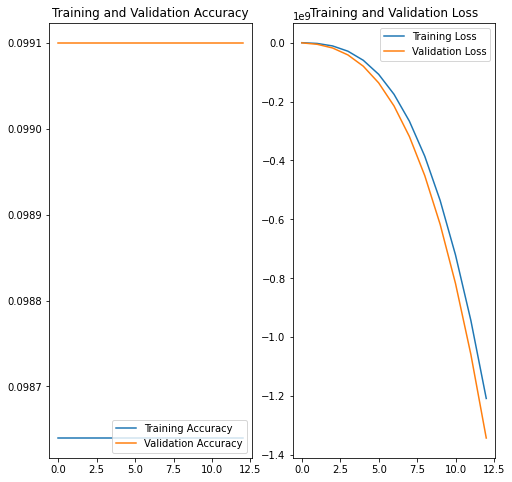

In [13]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(13)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
tf.keras.models.save_model(model,"/tmp/mobilenet/7/5")


INFO:tensorflow:Assets written to: /tmp/mobilenet/7/5/assets


In [14]:
import json
import numpy
import requests

re_da = x_val[11]
re_da = np.resize(re_da, [1, re_da.size])


data = json.dumps({"signature_name": "serving_default",
                   "instances":re_da.tolist()})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mobilenet1:predict',
                              data=data, headers=headers)
print(json_response.text)
predictions = numpy.array(json.loads(json_response.text)["predictions"])
predictions[0]

ConnectionError: HTTPConnectionPool(host='localhost', port=8501): Max retries exceeded with url: /v1/models/mobilenet1:predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f3194128e10>: Failed to establish a new connection: [Errno 111] Connection refused',))

In [41]:
dd = np.argmax([predictions[0]])
print(dd)
y_val[dd]

NameError: name 'predictions' is not defined

In [44]:
re_da = x_val[11]
re_da = np.resize(re_da, [1, re_da.size])
re_da




array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23137255, 0.9372549 , 0.30588236,
        0.        , 0.        , 0.        , 0.  

In [52]:
a = ["d","c","f",7]
b = ["c","a","c"]
c = set(a) - set(b)
for i in c:
    print(i)

f
d
7
